# 1. Environment Setting

## 1.1. Import Library

In [1]:
### system library
import os

### dataframe library
import pandas as pd

### numeric library
import numpy as np

### visualization
import matplotlib.pyplot as plt
from matplotlib import cm

## 1.2. Library Settings

In [2]:
pd.options.display.max_columns = 999
pd.options.display.max_rows = 999
pd.options.mode.chained_assignment = None

In [3]:
%matplotlib inline

## 1.3. Load Dataset

Dataset has problem in encoding and decoding.<br>
Change and save dataset with utf-8 encoded for further study.<br>

In [4]:
raw_dataset = pd.read_csv('./data/top10s.csv', encoding='mac_roman')
raw_dataset

,Unnamed: 0,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,2,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,3,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,4,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,5,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78
5,6,Baby,Justin Bieber,canadian pop,2010,65,86,73,-5,11,54,214,4,14,77
6,7,Dynamite,Taio Cruz,dance pop,2010,120,78,75,-4,4,82,203,0,9,77
7,8,Secrets,OneRepublic,dance pop,2010,148,76,52,-6,12,38,225,7,4,77
8,9,Empire State of Mind (Part II) Broken Down,Alicia Keys,hip pop,2010,93,37,48,-8,12,14,216,74,3,76
9,10,Only Girl (In The World),Rihanna,barbadian pop,2010,126,72,79,-4,7,61,235,13,4,73


In [5]:
raw_dataset.to_csv('./data/top10s_utf8.csv', encoding='utf-8', index=False)

In [6]:
raw_dataset = pd.read_csv('./data/top10s_utf8.csv', encoding='utf-8')
raw_dataset

,Unnamed: 0,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,2,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,3,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,4,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,5,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78
5,6,Baby,Justin Bieber,canadian pop,2010,65,86,73,-5,11,54,214,4,14,77
6,7,Dynamite,Taio Cruz,dance pop,2010,120,78,75,-4,4,82,203,0,9,77
7,8,Secrets,OneRepublic,dance pop,2010,148,76,52,-6,12,38,225,7,4,77
8,9,Empire State of Mind (Part II) Broken Down,Alicia Keys,hip pop,2010,93,37,48,-8,12,14,216,74,3,76
9,10,Only Girl (In The World),Rihanna,barbadian pop,2010,126,72,79,-4,7,61,235,13,4,73


# 2. Exploratory Data Analysis (EDA)

## 2.1. Who Published the Songs Most?

Find Top 10 Artists who published the most frequently.

In [7]:
def to_artist_and_frequency(artist_frequency):
    artist = [item[0] for item in artist_frequency]
    frequency = [item[1] for item in artist_frequency]
    
    return artist, frequency

In [8]:
'''Test'''
temp = [('Bruno Mars', 17), ('Maroon 5', 10)]
artist, frequency = to_artist_and_frequency(temp)
for a, f in zip(artist, frequency):
    print('{:12}{:2d}'.format(a, f))

Bruno Mars  17
Maroon 5    10


In [9]:
def get_artist_frequency(top=10):
    artist_frequency = raw_dataset['artist'].value_counts().to_dict()
    artist_frequency = sorted(artist_frequency.items(), key=lambda x: x[1], reverse=True)
    artist_frequency_top = artist_frequency[:top]
    
    frequency = artist_frequency[-1][1]
    
    idx = top
    while idx < len(artist_frequency) and artist_frequency[idx][1] == frequency:
        artist_frequency_top.append(artist_frequency[idx])
        idx += 1
    
    return artist_frequency_top

In [13]:
artist_frequency = get_artist_frequency(top=10)
artist, frequency = to_artist_and_frequency(artist_frequency)

for a, f in zip(artist, frequency):
    print('{:20}{:2d}'.format(a, f))

Katy Perry          17
Justin Bieber       16
Rihanna             15
Maroon 5            15
Lady Gaga           14
Bruno Mars          13
The Chainsmokers    11
Ed Sheeran          11
Shawn Mendes        11
Pitbull             11


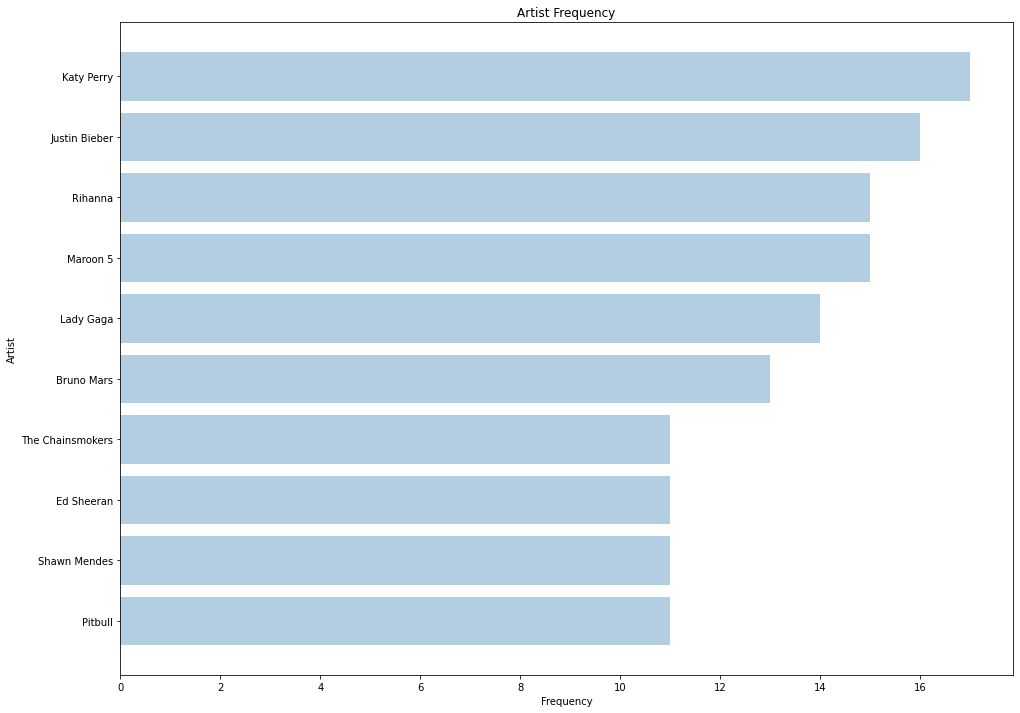

In [14]:
artist = artist[::-1]
frequency = frequency[::-1]

plt.figure(figsize=(16, 12))
plt.barh(artist, frequency, color=cm.Pastel1.colors[1])
plt.title('Artist Frequency')
plt.xlabel('Frequency')
plt.ylabel('Artist')
plt.show()

### 2.1.1 What year does Artist Publish Songs?

For the top most published artist, when do they publish the songs?

In [17]:
def get_artist_frequency_by_year(top=10):
    artist_frequency = get_artist_frequency(top)
    artist, frequency = to_artist_and_frequency(artist_frequency)

    artist_frequency_by_year = dict()
    year = sorted(raw_dataset['year'].unique())
    for y in year:
        artist_frequency_by_year[y] = list()
    
    artist_by_year = raw_dataset.groupby('artist')['year'].value_counts()
    
    for y in year:
        for a in artist:
            freq = 0
            if y in artist_by_year[a].index:
                freq = artist_by_year[a][y]
            artist_frequency_by_year[y].append((a, freq))
        
    return artist_frequency_by_year

In [19]:
artist_frequency_by_year = get_artist_frequency_by_year(top=10)
year = sorted(raw_dataset['year'].unique())

for y in year:
    print('[Year {:4d}]'.format(y))
    artist_frequency = artist_frequency_by_year[y]
    artist, frequency = to_artist_and_frequency(artist_frequency)
    for a, f, in zip(artist, frequency):
        print('\t{:20}{:2d}'.format(a, f))

[Year 2010]
	Katy Perry           2
	Justin Bieber        1
	Rihanna              2
	Maroon 5             1
	Lady Gaga            3
	Bruno Mars           2
	The Chainsmokers     0
	Ed Sheeran           0
	Shawn Mendes         0
	Pitbull              0
[Year 2011]
	Katy Perry           3
	Justin Bieber        0
	Rihanna              4
	Maroon 5             1
	Lady Gaga            5
	Bruno Mars           3
	The Chainsmokers     0
	Ed Sheeran           0
	Shawn Mendes         0
	Pitbull              1
[Year 2012]
	Katy Perry           3
	Justin Bieber        2
	Rihanna              3
	Maroon 5             2
	Lady Gaga            0
	Bruno Mars           2
	The Chainsmokers     0
	Ed Sheeran           0
	Shawn Mendes         0
	Pitbull              2
[Year 2013]
	Katy Perry           1
	Justin Bieber        1
	Rihanna              1
	Maroon 5             2
	Lady Gaga            1
	Bruno Mars           0
	The Chainsmokers     0
	Ed Sheeran           0
	Shawn Mendes         0
	Pitbull        

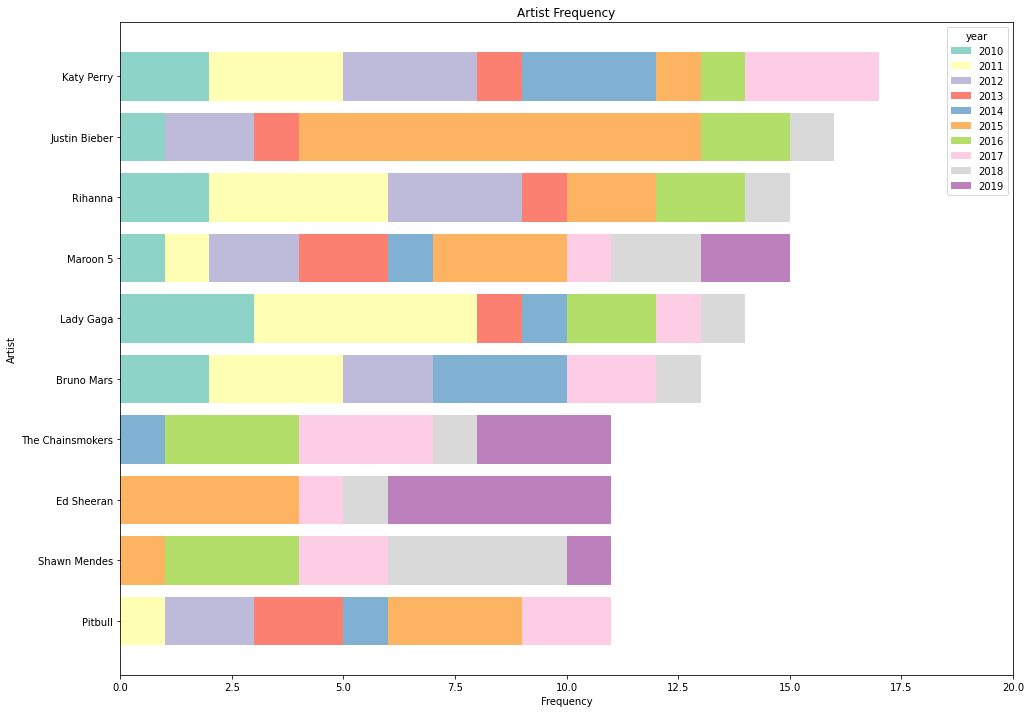

In [36]:
artist_frequency_by_year = get_artist_frequency_by_year(top=10)
year = sorted(raw_dataset['year'].unique())

total = [0] * 10
colormap = cm.Set3.colors

plt.figure(figsize=(16, 12))

for idx, y in enumerate(year):
    artist_frequency = artist_frequency_by_year[y]
    artist, frequency = to_artist_and_frequency(artist_frequency)
    
    artist = artist[::-1]
    frequency = frequency[::-1]
    
    plt.barh(artist, frequency, left=total, color=colormap[idx], label=str(y))
    total = [t + f for t, f in zip(total, frequency)]
    
plt.title('Artist Frequency')
plt.xlabel('Frequency')
plt.ylabel('Artist')
plt.xlim(0, 20)
plt.legend(title='year')
plt.show()

**Analysis**
1. Katy Perry works regulary from 2010 to 2017, but recently not working.
2. Justin Bieber works really hard in 2015
3. Maroon 5 is the most regulary worked artist. They only did not publish in 2016.
4. Lady Gaga work really hard in 2011
5. Ed Sheeran works at 2015, 2019. He is the most trending artist

### 2.1.2 What genre does Artist Publish Songs?

For the top most published artist, what genre do they publish the songs?

In [44]:
def get_artist_frequency_by_genre(top=10):
    artist_frequency = get_artist_frequency(top)
    artist, frequency = to_artist_and_frequency(artist_frequency)

    artist_frequency_by_genre = dict()
    genre = sorted(raw_dataset['top genre'].unique())
    for g in genre:
        artist_frequency_by_genre[g] = list()
    
    artist_by_genre = raw_dataset.groupby('artist')['top genre'].value_counts()
    
    for g in genre:
        for a in artist:
            freq = 0
            if g in artist_by_genre[a].index:
                freq = artist_by_genre[a][g]
            artist_frequency_by_genre[g].append((a, freq))
        
    return artist_frequency_by_genre

In [45]:
artist_frequency_by_genre = get_artist_frequency_by_genre(top=10)
genre = sorted(raw_dataset['top genre'].unique())

for g in genre:
    print('[Genre {:10}]'.format(g))
    artist_frequency = artist_frequency_by_genre[g]
    artist, frequency = to_artist_and_frequency(artist_frequency)
    for a, f, in zip(artist, frequency):
        print('\t{:20}{:2d}'.format(a, f))

[Genre acoustic pop]
	Katy Perry           0
	Justin Bieber        0
	Rihanna              0
	Maroon 5             0
	Lady Gaga            0
	Bruno Mars           0
	The Chainsmokers     0
	Ed Sheeran           0
	Shawn Mendes         0
	Pitbull              0
[Genre alaska indie]
	Katy Perry           0
	Justin Bieber        0
	Rihanna              0
	Maroon 5             0
	Lady Gaga            0
	Bruno Mars           0
	The Chainsmokers     0
	Ed Sheeran           0
	Shawn Mendes         0
	Pitbull              0
[Genre alternative r&b]
	Katy Perry           0
	Justin Bieber        0
	Rihanna              0
	Maroon 5             0
	Lady Gaga            0
	Bruno Mars           0
	The Chainsmokers     0
	Ed Sheeran           0
	Shawn Mendes         0
	Pitbull              0
[Genre art pop   ]
	Katy Perry           0
	Justin Bieber        0
	Rihanna              0
	Maroon 5             0
	Lady Gaga            0
	Bruno Mars           0
	The Chainsmokers     0
	Ed Sheeran           0
	Sh

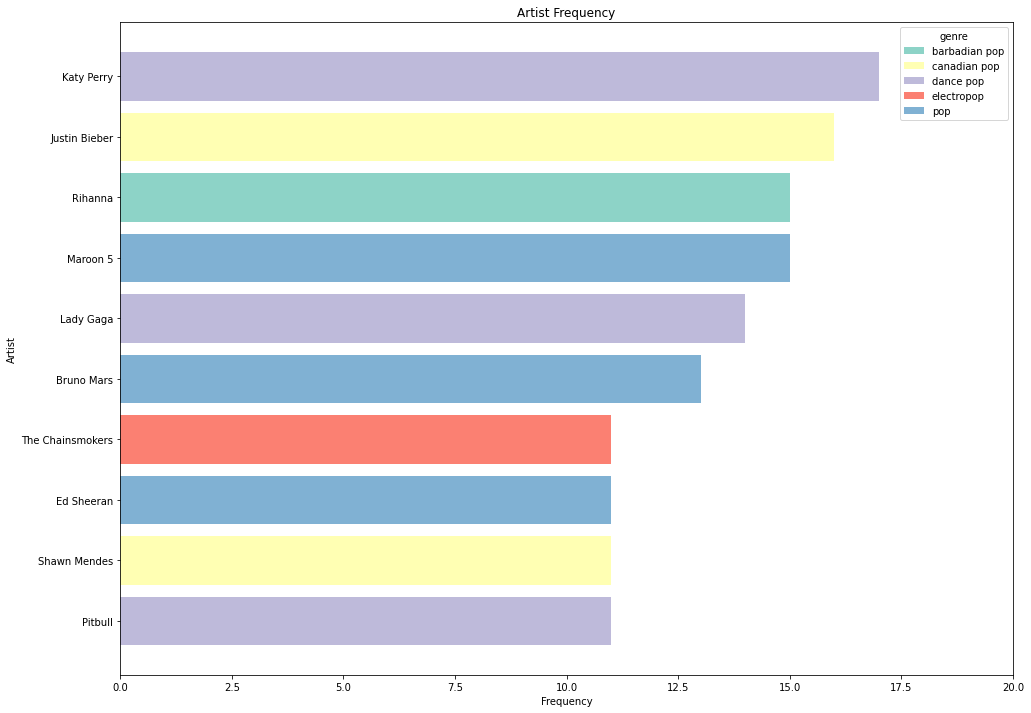

In [48]:
artist_frequency_by_genre = get_artist_frequency_by_genre(top=10)
genre = sorted(raw_dataset['top genre'].unique())

total = [0] * 10
colormap = cm.Set3.colors

plt.figure(figsize=(16, 12))

idx = 0
for g in genre:
    artist_frequency = artist_frequency_by_genre[g]
    artist, frequency = to_artist_and_frequency(artist_frequency)
    
    artist = artist[::-1]
    frequency = frequency[::-1]
    
    if sum(frequency) != 0:
        plt.barh(artist, frequency, left=total, color=colormap[idx], label=g)
        total = [t + f for t, f in zip(total, frequency)]
        idx += 1
    
plt.title('Artist Frequency')
plt.xlabel('Frequency')
plt.ylabel('Artist')
plt.xlim(0, 20)
plt.legend(title='genre')
plt.show()

**Analysis**
1. Literally Artist == Genre
2. All the genre is rooted to pop